In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import random
import pickle
import seaborn as sns
import math
import sys

In [2]:
data_df = pd.read_excel("https://ftp.ncbi.nlm.nih.gov/geo/series/\
GSE124nnn/GSE124548/suppl/\
GSE124548_AllData_170308_RNAseq_Kopp_Results.xlsx")
data_df = data_df.rename(columns=lambda x: re.sub("w_[0-9]+_O", "w_O",x))
data_df = data_df.rename(columns=lambda x: re.sub("m_[0-9]+_O", "m_O",x))
columns = list(data_df.columns) 
raw_cols = [x for x in columns if "Raw" in x] # get all raw values
raw_cols_sums = data_df[raw_cols].sum()
norm_cpm = [data_df[raw_cols].iloc[i]*1000000/raw_cols_sums \
            for i in range(data_df.shape[0])]
norm_cpm_df = pd.DataFrame(data=norm_cpm)
norm_cpm_df = pd.concat([norm_cpm_df, data_df[columns[:9]]], axis=1)
number_of_zeroes = [ list(norm_cpm_df[raw_cols].values[i]).count(0) for i in range(norm_cpm_df.shape[0])]
genes_no_zeroes_logic = [number_of_zeroes[i] == 0 for i in range(len(number_of_zeroes))]
data_df_subset = norm_cpm_df[genes_no_zeroes_logic]
healthy = [x for x in data_df_subset.columns if "HC" in x] # healthy control norm values
cf_base = [x for x in data_df_subset.columns if "Base" in x] # cf without treatment
cf_v2 = [x for x in data_df_subset.columns if "V2" in x] # cf with treatment

In [3]:
norm_hc_cf_with_genename = ["ID"]
norm_hc_cf_with_genename.extend(healthy)
norm_hc_cf_with_genename_melt = data_df_subset[norm_hc_cf_with_genename].melt("ID")
norm_hc_cf_with_genename_melt.variable="HC"
#print(norm_hc_cf_with_genename_melt.shape)


norm_cf_with_genename = ["ID"]
norm_cf_with_genename.extend(cf_base)
norm_cf_with_genename_melt = data_df_subset[norm_cf_with_genename].melt("ID")
norm_cf_with_genename_melt.variable="CF"
#print(norm_cf_with_genename_melt.shape)

norm_hc_cf_with_genename_melt = norm_hc_cf_with_genename_melt.append(norm_cf_with_genename_melt, ignore_index=True)

In [40]:
norm_hc_cf_with_genename_melt[norm_hc_cf_with_genename_melt.ID.isin(["SOCS3"])].sort_values("value")

,ID,variable,value
149581,SOCS3,HC,24.451028
210581,SOCS3,HC,28.492487
134331,SOCS3,HC,29.481317
195331,SOCS3,HC,39.938605
58081,SOCS3,HC,42.490738
607081,SOCS3,CF,44.896648
393581,SOCS3,CF,50.326740
241081,SOCS3,HC,52.787172
408831,SOCS3,CF,59.382361
164831,SOCS3,HC,65.893724


In [1]:
genestoplot=norm_hc_cf_with_genename_melt[norm_hc_cf_with_genename_melt.ID.isin(["MMP9","SOCS3","ANXA3"])]
plt.style.use('seaborn-notebook')
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,4), dpi=300, facecolor="white")
plt.rcParams['lines.linewidth']=.5
sns.violinplot(x="ID", y="value", hue="variable",data=genestoplot)
plt.title("Expression of Significant Genes")
plt.xlabel("Gene ID")
plt.ylabel("Scaled Expression Values")
plt.savefig('sig_genes_violin.png')

NameError: name 'norm_hc_cf_with_genename_melt' is not defined

In [18]:
top10_ci_genes = ['LOC105372578','MCEMP1','MMP9','ANXA3','SOCS3','IL1R2','G0S2','GALNT14','PFKFB3','OSM']

Text(0, 0.5, 'Scaled Expression Values')

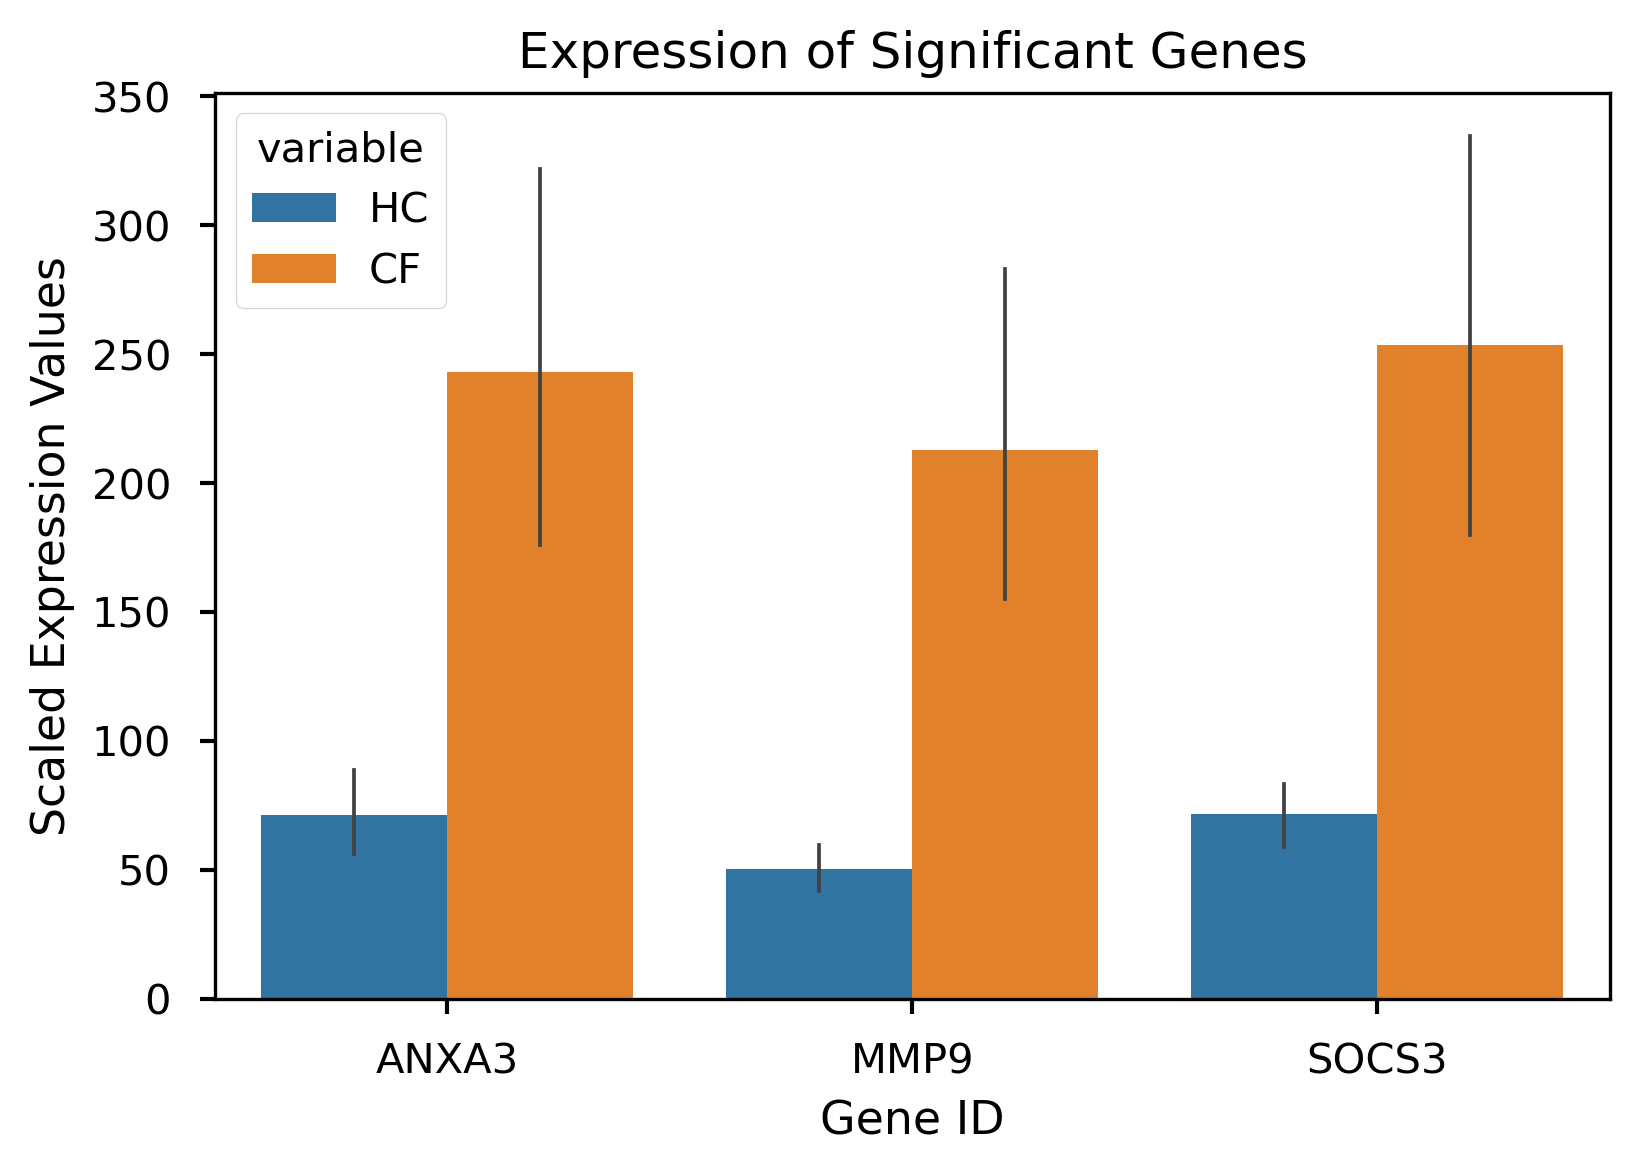

In [37]:
genestoplot=norm_hc_cf_with_genename_melt[norm_hc_cf_with_genename_melt.ID.isin(["MMP9","SOCS3","ANXA3"])]
plt.style.use('seaborn-notebook')
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,4), dpi=300, facecolor="white")
plt.rcParams['lines.linewidth']=.5
sns.barplot(x="ID", y="value", hue="variable",data=genestoplot)
plt.title("Expression of Significant Genes")
plt.xlabel("Gene ID")
plt.ylabel("Scaled Expression Values")

In [19]:
data_df_subset_bon_top10ci = data_df_subset[data_df_subset.ID.isin(top10_ci_genes)]
df_norm_hc_bon_sig_top10ci = data_df_subset_bon_top10ci[healthy]
df_norm_cf_bon_sig_top10ci = data_df_subset_bon_top10ci[cf_base]
print(df_norm_hc_bon_sig_top10ci.shape,df_norm_cf_bon_sig_top10ci.shape)

(10, 20) (10, 20)


In [20]:
df_norm_healthy_T = df_norm_hc_bon_sig_top10ci.T
labels_healthy = [1]*20

df_norm_base_T = df_norm_cf_bon_sig_top10ci.T
labels_patient = [0]*20
X1 = df_norm_healthy_T.values
X2 = df_norm_base_T.values
Y1 = np.zeros((1,20))
Y2 = np.ones((1,20))
X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=1)
Y = np.reshape(Y, 40)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [35]:
test_precision = []
test_recall = []
test_f1 = []
test_estimator = []
for i in range(100):
    clf = RandomForestClassifier()
    scoring = {'precision': 'precision',
               'recall': 'recall',
              'f1_macro':'f1_macro'}
    scores = cross_validate(clf, X, Y, cv=5, scoring=scoring, return_train_score=True, return_estimator=True)
    test_estimator.append(scores['estimator'])
    test_precision.append(scores['test_precision'].mean())
    test_recall.append(scores['test_recall'].mean())
    test_f1.append(scores['test_f1_macro'].mean())

In [36]:
test_estimator[:5]

[(RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()),
 (RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()),
 (RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()),
 (RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()),
 (RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier())]

Text(0.5, 1.0, '2-class Precision-Recall curve')

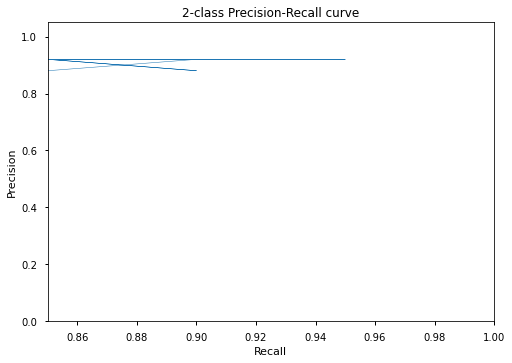

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

#plt.step(test_recall, test_precision, color='b', alpha=0.2,
#         where='post')
#plt.fill_between(test_recall, test_precision, step='post', alpha=0.2,
#                 color='b')

plt.plot(test_recall, test_precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([min(test_recall), 1.0])
plt.title('2-class Precision-Recall curve')